In [ ]:
import numpy as np 
import pandas as pd
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt


In [ ]:
import numpy as np 
import math
e = math.exp(1) # x1

In [ ]:

# plotting the cost function with w,b simple linear regression.
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X,y = fetch_california_housing(return_X_y = True)
y = y[0:50].reshape(-1,1)

for i in range(X.shape[1]):
    if i ==1:
        break
    print(f"i--> {i} and Xshape --> {X.shape[1]}")
    X1 = X[0:50,i:i+1]
    x_scaled = scalar.fit_transform(X1)

    print(f"X:{X1.shape} y:{y.shape}")
    from ml_implement.general_utils.univershal_plotter import UniversalPlotter
    plotter = UniversalPlotter()
    plotter.plot(
        data=None,
        kind="scatter",
        xdata=x_scaled,
        ydata=y,
        xlabel="f1",
        ylabel="price",
        title="House Price Prediction"
    )
    plt.show()



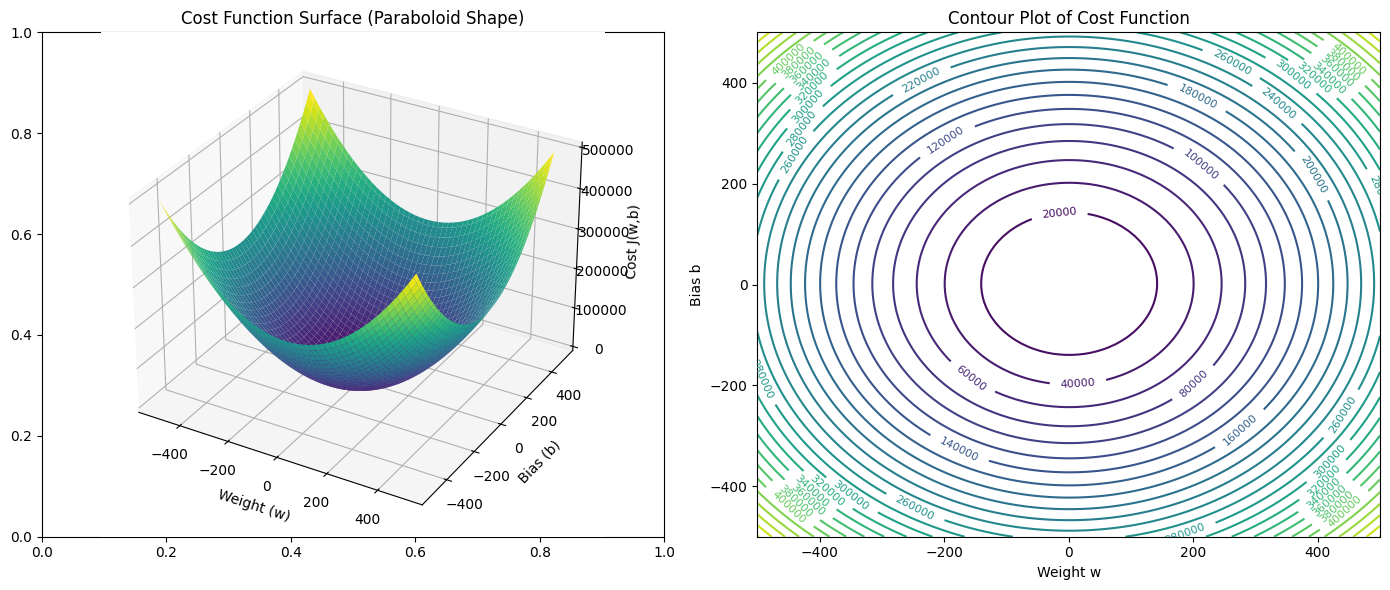

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = x_scaled
y = y
m = X.shape[0]
# Cost function
def compute_cost(w, b):
    y_pred = w * X + b
    cost = (1/m) * np.sum((y_pred - y)**2)
    return cost

# Create grid of w and b values
lowest_val = -500
highest_val = 500
w_values = np.linspace(lowest_val, highest_val, 100)
b_values = np.linspace(lowest_val, highest_val, 100)

W, B = np.meshgrid(w_values, b_values)
J = np.zeros(W.shape)

# Compute cost for each (w, b)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = compute_cost(W[i, j], B[i, j])

# Plot 3D paraboloid
fig,ax = plt.subplots(1,2,figsize = (14,6))
ax[0] = fig.add_subplot(1,2,1, projection="3d")

ax[0].plot_surface(W, B, J, cmap="viridis")

ax[0].set_xlabel("Weight (w)")
ax[0].set_ylabel(" Bias (b)")
ax[0].set_zlabel("Cost J(w,b)")
ax[0].set_title("Cost Function Surface (Paraboloid Shape)")

# Plot Contour (2D Ellipses)
# --------------------------
# fig = plt.figure()
# ax[1] = fig.add_subplot(1,2,2)
contour = ax[1].contour(W, B, J, levels=30)
# ax[1].contour(W, B, J, levels=30)
ax[1].clabel(contour, inline=True, fontsize=8)

ax[1].set_xlabel("Weight w")
ax[1].set_ylabel("Bias b")
ax[1].set_title("Contour Plot of Cost Function")

plt.tight_layout()
plt.show()



In [ ]:
w_values = np.linspace(-1,1,2)
b_values = np.linspace(-2,2,2)
W, B = np.meshgrid(w_values, b_values)
J = np.zeros(W.shape)

In [ ]:
def sigmoid(z):
    # y_sig = 1/(1+math.exp(-z)) 
    y_sig = 1/(1+np.exp(-z)) 
    return y_sig

z = np.linspace(-20,20,100)
y = np.zeros(z.shape[0])
for i in range(z.shape[0]):

    y[i] = sigmoid(z[i])

plt.plot(z,y)
plt.plot(z,0.5*(np.ones(z.shape)),alpha = 0.5, color= 'red')
plt.xlabel('z_values')
plt.ylabel('sigmoid func')
plt.grid()
# plt.legend()
plt.tight_layout()
plt.show()


### - **Plot Cost Surface J(w,b) using MSE (Logistic Regression)**
- **just for curiosity**

In [ ]:
# from ml_implement.general_utils.data_read import DataReader
# filepath = "/home/mrafiku/AI_learning/machine-learning-basics/data/logistic_regressionData"
# print(f"filepath :{filepath}")
# filename = "cancer_data.csv"
# reader = DataReader(filepath=filepath, filename=filename,filetype="csv",split=True, df_want=True)
# df,X_train,X_test,y_train,y_test = reader.run()

# inbuilt data Breast Cancer Dataset (Binary Classification):
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# print(data.target_names)
# print(data.feature_names)
# X_df = pd.DataFrame(data.data, columns=data.feature_names)
# X_df["target"] = data.target
# print(X_df.head())
X, y = load_breast_cancer(return_X_y=True)

print(f"Xshape:{X.shape} and y values{y[:100]} and y shape:{y.shape}:")
# X_df.head()
X_data = X[:100,0:1]
y_data = y[:100]
from ml_implement.general_utils.univershal_plotter import UniversalPlotter
plotter = UniversalPlotter()
plotter.plot(data=None,kind="scatter", xdata=X_data, ydata=y_data,alpha=0.9,xlabel='Mean radius',color='r', markersize = 1.5, ylabel='malignant=1 or benign = 0')

In [ ]:
# X = X_data
print(f"xshape: {X_data.shape} and Xmin:{min(X_data)} and Xmax:{max(X_data)}")

# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# X = scalar.fit_transform(X_data)
# m = X.shape[0]
# print(f"xshape: {X.shape} and Xmin:{min(X)} and Xmax:{max(X)}")

X = X_data
y = y_data

# sigmoid function:
def sigmoid(z):
    # y_sig = 1/(1+math.exp(-z)) 
    y_sig = 1/(1+np.exp(-z)) 
    return y_sig

# logistic prediction:
def logistic_prob(w,b):
    z = w*X + b
    return sigmoid(z)

# MSE cost for logistic regression

def mse_cost_logistic(w,b):
    y_hat = logistic_prob(w,b)
    return (1/m*np.sum(y_hat -y)**2)

# Create grid of w and b values
parameter_range = 1000
# -----------------------------
w_values = np.linspace(-parameter_range, parameter_range, 100)
b_values = np.linspace(-parameter_range, parameter_range, 100)

W, B = np.meshgrid(w_values, b_values)
J = np.zeros(W.shape)

# -----------------------------
# Compute cost for each (w, b)
# -----------------------------
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = mse_cost_logistic(W[i, j], B[i, j])*0.001

# -----------------------------
# Plot 3D surface
# -----------------------------
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(W, B, J, cmap="viridis", alpha=0.9)

ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Cost J(w,b) (K) ")
ax.set_title("Logistic Regression Cost Surface (MSE)")
ax.grid(alpha = 0.1)
# -----------------------------
# Plot contour plot
# -----------------------------
ax2 = fig.add_subplot(122)
contour = ax2.contour(W, B, J, levels=30)
ax2.clabel(contour, inline=True, fontsize=8)

ax2.set_xlabel("Weight (w)")
ax2.set_ylabel("Bias (b)")
ax2.set_title("Contour Plot of Cost (MSE Logistic)")

plt.tight_layout(pad=6.0)
plt.show()

#  this is for the interactive plots using the go.Figure Library.
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# from IPython.display import display

# Assuming mse_cost_logistic is defined in your notebook

# --- 2. Create the Plotly 3D Surface ---
fig_3d = go.Figure(data=[go.Surface(z=J, x=w_values, y=b_values, colorscale='Viridis')])
fig_3d.update_layout(
    title='3D Cost Surface (Interactive)',
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(xaxis_title='W', yaxis_title='B', zaxis_title='Cost (K)')
)



In [ ]:
#  with only one parameter w, b(bias) = 0 

X.shape[0]
print(f"xshape: {X.shape}")

# MSE cost for logistic regression
def mse_cost_logistic_plot(w =None,b=None,val_range = None,Total_intervals = None):
    if b != 0:
         b = b
    if w != 0:
         w = w
    # sigmoid function:
    def sigmoid(z):
        # y_sig = 1/(1+math.exp(-z)) 
        y_sig = 1/(1+np.exp(-z)) 
        return y_sig

    # logistic prediction:
    def logistic_prob(w,b):
        z = w*X + b
        return sigmoid(z)
    
    def mse_cost_logistic(w,b):
        y_hat = logistic_prob(w,b)
        return (1/m*np.sum(y_hat -y)**2)

    val_range = val_range if val_range else 50 

    if b == 0:
        w_values = np.linspace(-val_range, val_range,Total_intervals)
        print(f"shape of the w_values:{w_values.shape}")
        J = np.zeros(w_values.shape)

        # -----------------------------
        # Compute cost for each (w, b)
        # -----------------------------
        for i in range(w_values.shape[0]):
                J[i] = mse_cost_logistic(w_values[i],b)

    if w == 0:
        b_values = np.linspace(-val_range, val_range, 100)
        print(f"shape of the w_values:{b_values.shape}")
        J = np.zeros(b_values.shape)

        # -----------------------------
        # Compute cost for each (w, b)
        # -----------------------------
        for i in range(b_values.shape[0]):
                J[i] = mse_cost_logistic(w,b_values[i])
         

    # -----------------------------
    # Plot 2D surface
    # -----------------------------
    fig = plt.figure(figsize=(8,5))
    if b == 0:
        plt.plot(w_values,J)
        plt.xlabel("Weight (w)")
        plt.ylabel("Cost w.r.to W )")
                
    if w == 0:
        plt.plot(b_values,J)
        plt.xlabel("bias (b)")
        plt.ylabel("Cost w.r.to b)")

    plt.title("Plot of Cost (MSE Logistic Regression)")
    plt.grid()
    plt.tight_layout()
    plt.show()

# mse_cost_logistic_plot(w=0,b=None,val_range =200,Total_intervals = 800)
mse_cost_logistic_plot(w=None,b=0,val_range =20,Total_intervals = 8000)

In [ ]:
print(f"min X:{min(X)} and max x:{max(X)}")
plt.hist(X)

In [ ]:
# continue for the exact logistic regression cost function.
